In [130]:
import pandas as pd
import numpy as np
import sympy as sp
import math as m
from sympy import collect, simplify, expand, fraction, latex, diff, cancel, nsimplify
from IPython.display import display, Markdown, Math
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [131]:
def theta_hat_ploter(df, theta0, title, line_width=1.2):
    lst_color = ['b', 'y', 'g', 'r']
    lst_labels = df.columns
    graph = sns.lineplot(data=df, dashes=False)

    for i in range(len(theta0)):
        graph.axhline(y=theta0[i], color=lst_color[i], linestyle='--', linewidth=line_width, label=lst_labels[i])
        
    plt.title(title, fontsize=20)
    plt.ylabel('Magnitude of "Theta_hat"', fontsize=18)
    plt.xlabel('Time Stamps "t"', fontsize=18)
    plt.legend(bbox_to_anchor=(1.05, 1), 
               loc=2, 
               borderaxespad=0, 
               labels=lst_labels, 
               fontsize='xx-large')
    plt.show()

In [132]:
class numden_coeff:
    def __init__(self, expr, symb):
        self.num, self.denum = fraction(expr)
        self.symb = symb
        self.common_factor = None
        self.lst_denum_coeff = self.build_lst(self.denum)
        self.lst_num_coeff = self.build_lst(self.num)
        
    def build_lst(self, poly):
        order = sp.Poly(poly, self.symb).degree()
        lst = [expand(poly).coeff(self.symb**i) for i in range((order), 0, -1)]
        lst.append(poly.subs(self.symb,0))
        if (self.common_factor == None):
            self.common_factor = lst[0]
            
        lst = [simplify(lst[i]/self.common_factor) for i in range(order + 1)]
        return lst
    
    def disp(self):
        display(Markdown(r"Numerator coefficients (\beta)"), self.lst_num_coeff)
        display(Markdown(r"Denominator coefficients (alpha)"), self.lst_denum_coeff)

# Problem 1

## Part 1

In [133]:
a, b, p, e = sp.symbols("a b p e")
zeta, omega, gamma_prime, gamma, theta1, theta2 = sp.symbols("zeta omega \\gamma^{'} gamma theta_1 theta_2")
y, u, uc, ym = sp.symbols("y(t) u(t) u_{c}(t) y_m")

y_eq = sp.solve(sp.Eq(y*p**2, (-a*p*y + b*u)), y)[0]

u_eq = sp.solve(sp.Eq(u, (theta1*(y - uc) - theta2*p*y)), u)[0]
y_eq = sp.solve(sp.Eq(y, y_eq.subs(u, u_eq)), y)[0]
display(Math("y = "+latex(y_eq)))

<IPython.core.display.Math object>

In [134]:
bm0, am1, am0 = sp.symbols("b_{m0} a_{m1} a_{m0}")

b_m0 = omega**2
a_m1 = 2*zeta*omega
a_m0 = b_m0

# Bm = bm0
# Am = (p**2 + am1*p + bm0)

Bm = omega**2
Am = (p**2 + 2*zeta*omega*p + omega**2)

Gm = Bm/Am
Gm
display(Math("G_{m} = "+latex(Gm)))

<IPython.core.display.Math object>

In [135]:
num, den = fraction(y_eq)
num_m, den_m = fraction(Gm*uc)

theta_1 = sp.solve(sp.Eq(num, num_m), theta1)[0]
theta_2 = sp.solve(sp.Eq(den.subs(theta1, theta_1), den_m), theta2)[0]

display(Math("\\theta_1 =\;"+latex(theta_1)))
display(Math("\\theta_2 =\;"+latex(theta_2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [136]:
del_e_theta1 = collect(simplify(diff(y_eq, theta1)), p)
del_e_theta2 = collect(simplify(diff(y_eq, theta2)), p)

# del_e_theta1_fact = simplify(cancel(del_e_theta1/y_eq)*y)
# num_theta1, den_theta1 = fraction(del_e_theta1_fact)

# del_e_theta2_fact = simplify(cancel(del_e_theta2/y_eq)*y)
# num_theta2, den_theta2 = fraction(del_e_theta2_fact)

# display(Math("\\frac{\\partial e}{\\partial \\theta_1} =\;"
#              +latex(del_e_theta1)+"\;=\;"
#              +latex(del_e_theta1_fact.subs([(theta1, theta_1), (theta2, theta_2)]))+"\;=\;"
#              +latex(num_theta1.subs(theta2,theta_2)/(Am*theta_1))))

# display(Math("\\frac{\\partial e}{\\partial \\theta_2} =\;"
#              +latex(del_e_theta2)+"\;=\;"
#              +latex(del_e_theta2_fact.subs([(theta1, theta_1), (theta2, theta_2)]))+"\;=\;"
#              +latex(num_theta2/Am)))

display(Math("\\frac{\\partial e}{\\partial \\theta_1} =\;"+latex(del_e_theta1)))
display(Math("\\frac{\\partial e}{\\partial \\theta_2} =\;"+latex(del_e_theta2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [137]:
u_c = sp.solve(sp.Eq(ym, Gm*uc), uc)[0]

del_e_theta1_subd = del_e_theta1.subs([(uc,u_c),(theta1, theta_1), (theta2, theta_2)])
del_e_theta2_subd = del_e_theta2.subs([(uc,u_c),(theta1, theta_1), (theta2, theta_2)])

display(Math("\\frac{\\partial e}{\\partial \\theta_1} =\;"+latex(del_e_theta1_subd)))
display(Math("\\frac{\\partial e}{\\partial \\theta_2} =\;"+latex(del_e_theta2_subd)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [138]:
theta1_dot = -gamma_prime*e*del_e_theta1_subd
theta2_dot = -gamma_prime*e*del_e_theta2_subd

display(Math("\\dot{\\theta}_1 =\;"+latex(theta1_dot)))
display(Math("\\dot{\\theta}_2 =\;"+latex(theta2_dot)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Letting $\gamma = \gamma^{'}b$ gives

In [139]:
theta1_dot_subd = theta1_dot*gamma/(gamma_prime*b)
theta2_dot_subd = theta2_dot*gamma/(gamma_prime*b)

display(Math("\\dot{\\theta}_1 =\;"+latex(theta1_dot_subd)))
display(Math("\\dot{\\theta}_2 =\;"+latex(theta2_dot_subd)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [140]:
obj_theta1_dot = numden_coeff(theta1_dot_subd/ym, p)
obj_theta2_dot = numden_coeff(theta2_dot_subd/ym, p)

atheta1 = obj_theta1_dot.lst_denum_coeff[::-1]
btheta1 = obj_theta1_dot.lst_num_coeff[::-1]

atheta2 = obj_theta2_dot.lst_denum_coeff[::-1]
btheta2 = obj_theta2_dot.lst_num_coeff[::-1]

display(Math("\\alpha\\dot{\\theta}_1 =\;"+latex(atheta1)))
display(Math("\\beta\\dot{\\theta}_1 =\;"+latex(btheta1)))

display(Math("\\alpha\\dot{\\theta}_2 =\;"+latex(atheta2)))
display(Math("\\beta\\dot{\\theta}_2 =\;"+latex(btheta2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [141]:
gamma_val = 7.5
omega_val = 1.5
zeta_val = 0.6

ym_d, ym_dd = sp.symbols("\\dot{y}_{m} \\ddot{y}_{m}")
theta1d, theta1dd = sp.symbols("\\dot{\\theta}_{1} \\ddot{\\theta}_{1}") 
theta2d, theta2dd = sp.symbols("\\dot{\\theta}_{2} \\ddot{\\theta}_{2}") 

theta1_ddd = -atheta1[0]*theta1d - atheta1[1]*theta1dd + btheta1[1]*ym_d + btheta1[2]*ym_dd
theta2_ddd = -atheta2[0]*theta2d - atheta2[1]*theta2dd + btheta2[1]*ym_d

theta1_ddd_subd = theta1_ddd.subs([(gamma, gamma_val),(omega,omega_val), (zeta, zeta_val)])
theta2_ddd_subd = theta2_ddd.subs([(gamma, gamma_val),(omega,omega_val), (zeta, zeta_val)])

theta1_ddd_func = sp.lambdify([theta1d, theta1dd, ym_d, ym_dd, e], theta1_ddd_subd)
theta2_ddd_func = sp.lambdify([theta2d, theta2dd, ym_d, e], theta2_ddd_subd)

display(Math("\\dddot{\\theta}_1 =\;"+latex(theta1_ddd_subd)))
display(Math("\\dddot{\\theta}_2 =\;"+latex(theta2_ddd_subd)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [146]:
def ode_solver(y0, t, a, b, omega, zeta, gamma):
    
    ym, ym_dot = y0[0], y0[1]
    y, y_dot = y0[2], y0[3]
    theta1, theta1_dot, theta1_dotdot = y0[4], y0[5], y0[6]
    theta2, theta2_dot, theta2_dotdot = y0[7], y0[8], y0[9]
    u = y0[10]
    u_c_ode = m.sin(m.pi*t/15) >= 0
    
    ym_dotdot = -2*omega*zeta*ym_dot - omega**2*ym + omega**2*u_c_ode
    y_dotdot = -(a + b*theta2)*y_dot + b*theta1*(y - u_c_ode)
    e = y_dot - ym_dot

    theta1_dotdotdot = theta1_ddd_func(theta1_dot, theta1_dotdot, ym_dot, ym_dotdot, e)
    theta2_dotdotdot = theta2_ddd_func(theta2_dot, theta2_dotdot, ym_dot, e)
    
    u = theta1*(y - u_c_ode) - theta2*y_dot
    
    return [ym_dot, ym_dotdot,
            y_dot, y_dotdot,
            theta1_dot, theta1_dotdot, theta1_dotdotdot,
            theta2_dot, theta2_dotdot, theta2_dotdotdot,
            u]

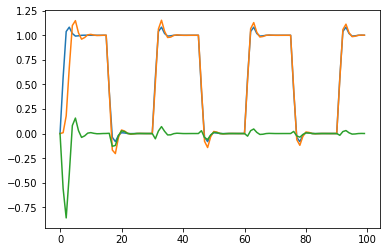

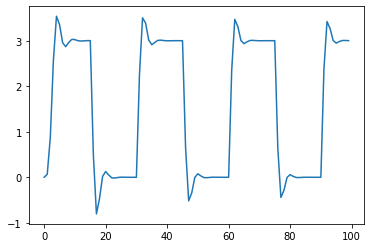

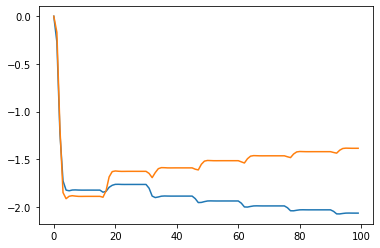

In [147]:
T_val = 0.1
sample_depth = int(10/T_val) # 1000 samples totalling 100 seconds (since sample time T is 0.1 secons)
sample_range = range(sample_depth)
starting_samples = 3

gamma_val = 7.5
omega_val = 1.5
zeta_val = 0.6
a_val = 3
b_val = 1

# calculation of input signal
t = [i for i in sample_range]
u_c = np.ones(sample_depth)
u_c[np.where([m.sin(t[i]*m.pi*T_val/15)<=0 for i in sample_range])] = 0

y0 = [0]*11

ode_res = odeint(ode_solver, y0, t, args=(a_val, b_val,
                                          omega_val,
                                          zeta_val,
                                          gamma_val))
plt.plot(t, ode_res[:, 0])
plt.plot(t, ode_res[:, 2])

plt.plot(t, ode_res[:,2] - ode_res[:,0])
plt.show()

plt.plot(t, ode_res[:,10])
plt.show()

plt.plot(t, ode_res[:,4])
plt.plot(t, ode_res[:,7])
plt.show()

In [154]:
obj_theta1_dot = numden_coeff(theta1_dot_subd/(ym*e*gamma), p)
obj_theta2_dot = numden_coeff(theta2_dot_subd/(ym*e*gamma), p)

atheta1 = obj_theta1_dot.lst_denum_coeff[::-1]
btheta1 = obj_theta1_dot.lst_num_coeff[::-1]

atheta2 = obj_theta2_dot.lst_denum_coeff[::-1]
btheta2 = obj_theta2_dot.lst_num_coeff[::-1]

display(Math("\\alpha\\dot{\\theta}_1 =\;"+latex(atheta1)))
display(Math("\\beta\\dot{\\theta}_1 =\;"+latex(btheta1)))

display(Math("\\alpha\\dot{\\theta}_2 =\;"+latex(atheta2)))
display(Math("\\beta\\dot{\\theta}_2 =\;"+latex(btheta2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [155]:
gamma_val = 7.5
omega_val = 1.5
zeta_val = 0.6

ym_d, ym_dd = sp.symbols("\\dot{y}_{m} \\ddot{y}_{m}")
theta1d, theta1dd = sp.symbols("\\dot{\\theta}_{1} \\ddot{\\theta}_{1}") 
theta2d, theta2dd = sp.symbols("\\dot{\\theta}_{2} \\ddot{\\theta}_{2}") 

theta1_ddd = atheta1[0]*theta1d + atheta1[1]*theta1dd + btheta1[1]*ym_d + btheta1[2]*ym_dd
theta2_ddd = atheta2[0]*theta2d + atheta2[1]*theta2dd + btheta2[1]*ym_d

theta1_ddd_subd = theta1_ddd.subs([(gamma, gamma_val),(omega,omega_val), (zeta, zeta_val)])
theta2_ddd_subd = theta2_ddd.subs([(gamma, gamma_val),(omega,omega_val), (zeta, zeta_val)])

theta1_ddd_func = sp.lambdify([theta1d, theta1dd, ym_d, ym_dd], theta1_ddd_subd)
theta2_ddd_func = sp.lambdify([theta2d, theta2dd, ym_d], theta2_ddd_subd)

display(Math("\\dddot{\\theta}_1 =\;"+latex(theta1_ddd_subd)))
display(Math("\\dddot{\\theta}_2 =\;"+latex(theta2_ddd_subd)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [156]:
def ode_solver(y0, t, a, b, omega, zeta, gamma, alpha):
    
    ym, ym_dot = y0[0], y0[1]
    y, y_dot = y0[2], y0[3]
    theta1, theta1_dot, theta1_dotdot = y0[4], y0[5], y0[6]
    theta2, theta2_dot, theta2_dotdot = y0[7], y0[8], y0[9]
    theta1_norm = y0[10]
    theta2_norm = y0[11]
    u = y0[12]
    u_c_ode = m.sin(m.pi*t/15) >= 0
    
    ym_dotdot = -2*omega*zeta*ym_dot - omega**2*ym + omega**2*u_c_ode
    y_dotdot = -(a + b*theta2_norm)*y_dot + b*theta1_norm*(y - u_c_ode)
    e = y_dot - ym_dot

    theta1_dotdotdot = theta1_ddd_func(theta1_dot, theta1_dotdot, ym_dot, ym_dotdot)
    theta2_dotdotdot = theta2_ddd_func(theta2_dot, theta2_dotdot, ym_dot)
#     theta1_dotdotdot = 2*zeta*omega*theta1_dotdot + omega**2*theta1_dot + (2*zeta*omega*ym_dot + ym_dotdot)/omega**2
#     theta2_dotdotdot = 2*zeta*omega*theta2_dotdot + omega**2*theta2_dot + ym_dot
    
    theta1_n = theta1*e*gamma/(alpha + (theta1)**2)
    theta2_n = theta2*e*gamma/(alpha + (theta2)**2)
    
    u = theta1_norm*(y - u_c_ode) - theta2_norm*y_dot
    
    return [ym_dot, ym_dotdot,
            y_dot, y_dotdot,
            theta1_dot, theta1_dotdot, theta1_dotdotdot,
            theta2_dot, theta2_dotdot, theta2_dotdotdot,
            theta1_n,
            theta2_n,
            u]

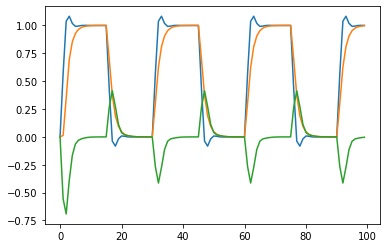

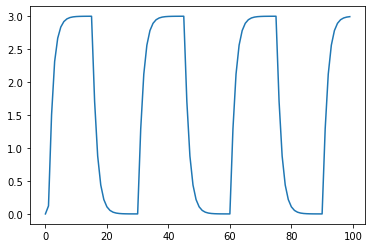

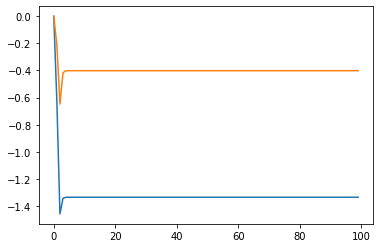

In [158]:
T_val = 0.1
sample_depth = int(10/T_val) # 1000 samples totalling 100 seconds (since sample time T is 0.1 secons)
sample_range = range(sample_depth)
starting_samples = 3

alpha_val = 0.5
gamma_val = 7.5
omega_val = 1.5
zeta_val = 0.6
a_val = 3
b_val = 1

# calculation of input signal
t = [i for i in sample_range]
u_c = np.ones(sample_depth)
u_c[np.where([m.sin(t[i]*m.pi*T_val/15)<=0 for i in sample_range])] = 0

y0 = [0]*13

ode_res = odeint(ode_solver, y0, t, args=(a_val, b_val,
                                          omega_val,
                                          zeta_val,
                                          gamma_val,
                                          alpha_val))
plt.plot(t, ode_res[:, 0])
plt.plot(t, ode_res[:, 2])

plt.plot(t, ode_res[:,2] - ode_res[:,0])
plt.show()

plt.plot(t, ode_res[:,12])
plt.show()

plt.plot(t, ode_res[:,10])
plt.plot(t, ode_res[:,11])
plt.show()

In [52]:
e1 = theta1_dot_subd/(gamma*e*ym)
e2 = theta2_dot_subd/(gamma*e*ym)

display(e1)
display(e2)

p*(2*omega*zeta + p)/(omega**2*(omega**2 + 2*omega*p*zeta + p**2))

p/(omega**2 + 2*omega*p*zeta + p**2)

In [76]:
obj_e1_dot = numden_coeff(theta1_dot_subd/(gamma*e*ym), p)
obj_e2_dot = numden_coeff(theta2_dot_subd/(gamma*e*ym), p)

ae1 = obj_e1_dot.lst_denum_coeff[::-1]
be1 = obj_e1_dot.lst_num_coeff[::-1]

ae2 = obj_e2_dot.lst_denum_coeff[::-1]
be2 = obj_e2_dot.lst_num_coeff[::-1]

display(Math("\\alpha\\dot{e}_1 =\;"+latex(ae1)))
display(Math("\\beta\\dot{e}_1 =\;"+latex(be1)))

display(Math("\\alpha\\dot{e}_2 =\;"+latex(ae2)))
display(Math("\\beta\\dot{e}_2 =\;"+latex(be2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [77]:
gamma_val = 7.5
omega_val = 1.5
zeta_val = 0.6

ym_d, ym_dd = sp.symbols("\\dot{y}_{m} \\ddot{y}_{m}")
e1d, e1dd = sp.symbols("\\dot{e}_{1} \\ddot{e}_{1}") 
e2d, e2dd = sp.symbols("\\dot{e}_{2} \\ddot{e}_{2}") 

e1_ddd = -ae1[0]*e1d - ae1[1]*e1dd + be1[1]*ym_d + be1[2]*ym_dd
e2_ddd = -ae2[0]*e2d - ae2[1]*e2dd + be2[1]*ym_d

e1_ddd_subd = e1_ddd.subs([(gamma, gamma_val),(omega,omega_val), (zeta, zeta_val)])
e2_ddd_subd = e2_ddd.subs([(gamma, gamma_val),(omega,omega_val), (zeta, zeta_val)])

e1_ddd_func = sp.lambdify([e1d, e1dd, ym_d, ym_dd, e], e1_ddd_subd)
e2_ddd_func = sp.lambdify([e2d, e2dd, ym_d, e], e2_ddd_subd)

display(Math("\\dddot{e}_1 =\;"+latex(e1_ddd_subd)))
display(Math("\\dddot{e}_2 =\;"+latex(e2_ddd_subd)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [84]:
def ode_solver(y0, t, a, b, omega, zeta, gamma, alpha):
    
    ym, ym_dot = y0[0], y0[1]
    y, y_dot = y0[2], y0[3]
    theta1, theta1_dot, theta1_dotdot = y0[4], y0[5], y0[6]
    theta2, theta2_dot, theta2_dotdot = y0[7], y0[8], y0[9]
    u = y0[10]
    e1, e1_dot, e1_dotdot = y0[11], y0[12], y0[13]
    e2, e2_dot, e2_dotdot = y0[14], y0[15], y0[16]
    
    norm_theta1 = y0[17]
    norm_theta2 = y0[18]
    
    
    u_c_ode = m.sin(m.pi*t/15) >= 0
    
    ym_dotdot = -2*omega*zeta*ym_dot - omega**2*ym + omega**2*u_c_ode
    y_dotdot = -(a + b*theta2)*y_dot + b*theta1*(y - u_c_ode)
    e = y_dot - ym_dot

    theta1_dotdotdot = theta1_ddd_func(theta1_dot, theta1_dotdot, ym_dot, ym_dotdot, e)
    theta2_dotdotdot = theta2_ddd_func(theta2_dot, theta2_dotdot, ym_dot, e)
    
    e1_dotdotdot = e1_ddd_func(e1_dot, e1_dotdot, ym_dot, ym_dotdot, e)
    e2_dotdotdot = e2_ddd_func(e2_dot, e2_dotdot, ym_dot, e)
    
    norm_theta1 = theta1_dotdotdot/(alpha + e1_dotdotdot**2)
    norm_theta2 = theta2_dotdotdot/(alpha + e2_dotdotdot**2)
    
    u = theta1*(y - u_c_ode) - theta2*y_dot
    
    return [ym_dot, ym_dotdot,
            y_dot, y_dotdot,
            theta1_dot, theta1_dotdot, norm_theta1,
            theta2_dot, theta2_dotdot, norm_theta2,
            e1, e1_dot, e1_dotdot,
            e2, e2_dot, e2_dotdot,
            norm_theta1,
            norm_theta2,
            u]

c:\users\clive\appdata\local\programs\python\python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


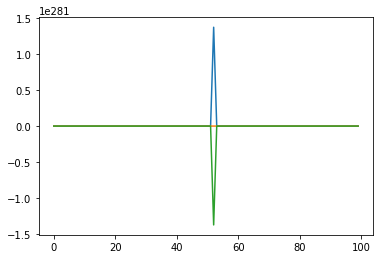

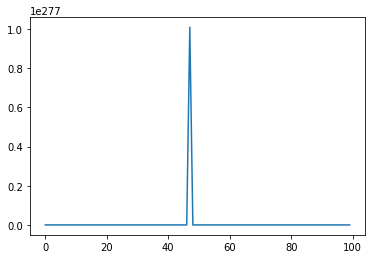

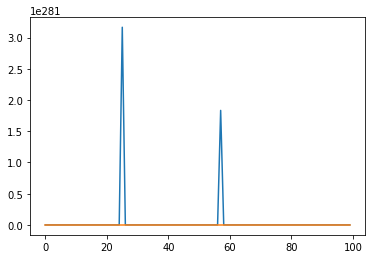

In [85]:
T_val = 0.1
sample_depth = int(10/T_val) # 1000 samples totalling 100 seconds (since sample time T is 0.1 secons)
sample_range = range(sample_depth)
starting_samples = 3

alpha_val = 0.5
gamma_val = 7.5
omega_val = 1.5
zeta_val = 0.6
a_val = 3
b_val = 1

# calculation of input signal
t = [i for i in sample_range]
u_c = np.ones(sample_depth)
u_c[np.where([m.sin(t[i]*m.pi*T_val/15)<=0 for i in sample_range])] = 0

y0 = [0]*19

ode_res = odeint(ode_solver, y0, t, args=(a_val, b_val,
                                          omega_val,
                                          zeta_val,
                                          gamma_val,
                                          alpha_val))
plt.plot(t, ode_res[:, 0])
plt.plot(t, ode_res[:, 2])

plt.plot(t, ode_res[:,2] - ode_res[:,0])
plt.show()

plt.plot(t, ode_res[:,10])
plt.show()

plt.plot(t, ode_res[:,4])
plt.plot(t, ode_res[:,7])
plt.show()

In [ ]:
def ode_solver(y0, t, a, b, omega, zeta, gamma):
    
    ym, ym_dot = y0[0], y0[1]
    y, y_dot = y0[2], y0[3]
    theta1, theta1_dot, theta1_dotdot = y0[4], y0[5], y0[6]
    theta2, theta2_dot, theta2_dotdot = y0[7], y0[8], y0[9]
    u = y0[10]
    u_c_ode = m.sin(m.pi*t/15) >= 0
    
    ym_dotdot = -2*omega*zeta*ym_dot - omega**2*ym + omega**2*u_c_ode
    y_dotdot = -(a + b*theta2)*y_dot + b*theta1*(y - u_c_ode)
    e = y_dot - ym_dot

    theta1_dotdotdot = theta1_ddd_func(theta1_dot, theta1_dotdot, ym_dot, ym_dotdot, e)
    theta2_dotdotdot = theta2_ddd_func(theta2_dot, theta2_dotdot, ym_dot, e)
    
    u = theta1*(y - u_c_ode) - theta2*y_dot
    
    return [ym_dot, ym_dotdot,
            y_dot, y_dotdot,
            theta1_dot, theta1_dotdot, theta1_dotdotdot,
            theta2_dot, theta2_dotdot, theta2_dotdotdot,
            u]

### Billinear Transformations

In [15]:
# T, q, y_dot = sp.symbols('T q \\dot{y}')

# bilinear_T = (2/T)*((1 - q**(-1))/(1 + q**(-1))) # what will be subsituted for s (kept actual equations in terms of s)

In [16]:
# # y_dot = (-y*p**2 + b*u)/a
# yDot_eq = sp.solve(sp.Eq(y_dot*p, (-a*y_dot + b*u)), y_dot)[0]
# yDot_eq

In [17]:
# ym_b = collect(simplify(expand(Gm.subs(p,bilinear_T))), q)
# # y_b = collect(simplify(expand((y_eq.subs([(theta1, theta_1), (theta2, theta_2)])/uc).subs(p,bilinear_T))), q)
# # y_b = collect(simplify(expand((y_eq/uc).subs(p,bilinear_T))), q)
# yDot_b = collect(simplify(expand((yDot_eq/u).subs(p,bilinear_T))), q)
# # yDot_b = collect(expand(simplify(expand((yDot_eq/u).subs(p,bilinear_T)))), q)
# theta1_dot_b = collect(simplify(expand((theta1_dot_subd/ym).subs(p,bilinear_T))), q)
# theta2_dot_b = collect(simplify(expand((theta2_dot_subd/ym).subs(p,bilinear_T))), q)

# display(Math("y_m =\;"+latex(ym_b)))
# display(Math("\\dot{y} =\;"+latex(yDot_b)))
# display(Math("\\dot{\\theta}_1 =\;"+latex(theta1_dot_b)))
# display(Math("\\dot{\\theta}_2 =\;"+latex(theta2_dot_b)))

In [18]:
# obj_ym = numden_coeff(ym_b, q)
# obj_yDot = numden_coeff(yDot_b, q)
# obj_theta1_dot = numden_coeff(theta1_dot_b, q)
# obj_theta2_dot = numden_coeff(theta2_dot_b, q)

# aym = obj_ym.lst_denum_coeff
# bym = obj_ym.lst_num_coeff

# ayDot = obj_yDot.lst_denum_coeff
# byDot = obj_yDot.lst_num_coeff

# atheta1 = obj_theta1_dot.lst_denum_coeff
# btheta1 = obj_theta1_dot.lst_num_coeff

# atheta2 = obj_theta2_dot.lst_denum_coeff
# btheta2 = obj_theta2_dot.lst_num_coeff


# display(Math("\\alpha y_m =\;"+latex(aym)))
# display(Math("\\beta y_m =\;"+latex(bym)))

# display(Math("\\alpha \\dot{y} =\;"+latex(ayDot)))
# display(Math("\\beta \\dot{y} =\;"+latex(byDot)))

# display(Math("\\alpha\\dot{\\theta}_1 =\;"+latex(atheta1)))
# display(Math("\\beta\\dot{\\theta}_1 =\;"+latex(btheta1)))

# display(Math("\\alpha\\dot{\\theta}_2 =\;"+latex(atheta2)))
# display(Math("\\beta\\dot{\\theta}_2 =\;"+latex(btheta2)))

In [19]:
# ym_k, ym_k_1, ym_k_2, uc_k, uc_k_1, uc_k_2 = sp.symbols("y_{m}(k) y_{m}(k-1) y_{m}(k-2) u_{c}(k) u_{c}(k-1) u_{c}(k-2)")
# yDot_k_1, u_k, u_k_1 = sp.symbols("\\dot{y}(k-1) u(k) u(k-1)")
# theta1Dot_k_1, theta1Dot_k_2 = sp.symbols("\\dot{\\theta}_{1}(k-1) \\dot{\\theta}_{1}(k-2)") 
# theta2Dot_k_1, theta2Dot_k_2 = sp.symbols("\\dot{\\theta}_{2}(k-1) \\dot{\\theta}_{2}(k-2)") 

# ym_eq = -ym_k_1*aym[1] - ym_k_2*aym[2] + uc_k*bym[0] + uc_k_1*bym[1] + uc_k_2*bym[2]
# yDot_eq = -yDot_k_1*ayDot[1] + u_k*byDot[0] + u_k_1*byDot[1]
# theta1Dot_eq = -theta1Dot_k_1*atheta1[1] - theta1Dot_k_2*atheta1[2] + ym_k*btheta1[0] + ym_k_1*btheta1[1] + ym_k_2*btheta1[2]
# theta2Dot_eq = -theta2Dot_k_1*atheta2[1] - theta2Dot_k_2*atheta2[2] + ym_k*btheta2[0] + ym_k_2*btheta2[2]

# display(Math("y_m =\;"+latex(ym_eq)))
# display(Math("\\dot{y} =\;"+latex(yDot_eq)))
# display(Math("\\dot{\\theta}_1 =\;"+latex(theta1Dot_eq)))
# display(Math("\\dot{\\theta}_2 =\;"+latex(theta2Dot_eq)))

## Part 2

In [20]:
# T_val = 0.1
# gamma_val = 5
# omega_val = 1.5
# zeta_val = 0.6
# a_val = 3
# b_val = 1

# ym_eq_subd = ym_eq.subs([(T, T_val), (omega, omega_val), (zeta, zeta_val)])
# yDot_eq_subd = yDot_eq.subs([(T, T_val), (a, a_val), (b,b_val)])
# theta1Dot_eq_subd = theta1Dot_eq.subs([(T, T_val), (omega, omega_val), (zeta, zeta_val), (gamma, gamma_val)])
# theta2Dot_eq_subd = theta2Dot_eq.subs([(T, T_val), (omega, omega_val), (zeta, zeta_val), (gamma, gamma_val)])

# ym_func = sp.lambdify([ym_k_1, ym_k_2, uc_k, uc_k_1, uc_k_2], ym_eq_subd)
# yDot_func = sp.lambdify([yDot_k_1, u_k, u_k_1], yDot_eq_subd)
# theta1Dot_func = sp.lambdify([theta1Dot_k_1, theta1Dot_k_2, ym_k, ym_k_1, ym_k_2, e], theta1Dot_eq_subd)
# theta2Dot_func = sp.lambdify([theta2Dot_k_1, theta2Dot_k_2, ym_k, ym_k_2, e], theta2Dot_eq_subd)

# display(Math("y_m =\;"+latex(ym_eq_subd)))
# display(Math("\\dot{y} =\;"+latex(yDot_eq_subd)))
# display(Math("\\dot{\\theta}_1 =\;"+latex(theta1Dot_eq_subd)))
# display(Math("\\dot{\\theta}_2 =\;"+latex(theta2Dot_eq_subd)))

In [21]:
# sample_depth = int(100/T_val) # 1000 samples totalling 100 seconds (since sample time T is 0.1 secons)
# sample_range = range(sample_depth)
# starting_samples = 3

# # calculation of input signal
# t = [i for i in sample_range]
# u_c = np.ones(sample_depth)
# u_c[np.where([m.sin(t[i]*m.pi*T_val/15)<=0 for i in sample_range])] = 0

# y = [0]*starting_samples
# y_m = [0]*starting_samples
# u = [0]*starting_samples
# theta1 = [0]*starting_samples
# theta2 = [0]*starting_samples
# e_val = 0

# y_dot = [0]*starting_samples
# theta1_dot = [0]*starting_samples
# theta2_dot = [0]*starting_samples

# for i in range(starting_samples, sample_depth):
#     u.append(theta1[-1]*(y[-1] - u_c[i]) - theta2[-1]*y_dot[-1])
# #     u.append((omega_val**2/b_val)*(y[-1] - u_c[i-1]) - ((-a_val + 2*omega_val*zeta_val)/b_val)*y_dot[-1])
    
#     y_m.append(np.reshape(ym_func(y_m[-1], y_m[-2], u_c[i], u_c[i-1], u_c[i-2]), ()))
#     y_dot.append(np.reshape(yDot_func(y_dot[-1], u_c[i], u_c[i-1]), ()))
#     theta1_dot.append(np.reshape(theta1Dot_func(theta1_dot[-1], theta1_dot[-2], y_m[i], y_m[i-1], y_m[i-2], e_val), ()))
#     theta2_dot.append(np.reshape(theta2Dot_func(theta2_dot[-1], theta2_dot[-2], y_m[i], y_m[i-2], e_val), ()))
    
#     y.append(y[-1] + T_val*y_dot[i-1])
#     theta1.append(theta1[-1] + T_val*theta1_dot[i-1])
#     theta2.append(theta2[-1] + T_val*theta2_dot[i-1])
#     e_val = y[i] - y_m[i]

# plt.plot(y)
# plt.plot(y_m)
# plt.show()

# plt.plot(u_c)
# plt.plot(u)
# plt.show()

# plt.plot(theta1)
# plt.plot(theta2)
# plt.show()

# Problem 2

## Part 1

In [22]:
y, u, uc, ym, e = sp.symbols("y(t) u(t) u_{c}(t) y_m e")
alpha, beta, gamma, b, theta1, theta2, p = sp.symbols("alpha beta gamma b theta_1 theta_2 p")

V1 = 0.5*e**2
V2 = 1/(b*gamma*2)*(alpha - b*theta2)**2
V3 = 1/(b*gamma*2)*(beta - b*theta1)**2
V = V1 + V2 + V3

y_eq = b*u/p
u_eq = theta1*uc - theta2*y

y_eq = sp.solve(sp.Eq(y,y_eq.subs(u, u_eq)),y)[0]
display(Math("y = "+latex(y_eq)))

<IPython.core.display.Math object>

In [23]:
Bm = beta
Am = p + alpha

Gm = Bm/Am

ym_eq = sp.solve(sp.Eq(ym,Gm*uc), ym)[0]
display(Math("y_{m} = "+latex(ym_eq)))

<IPython.core.display.Math object>

In [24]:
num, den = fraction(y_eq)
num_m, den_m = fraction(ym_eq)

theta_1 = sp.solve(sp.Eq(num, num_m), theta1)[0]
theta_2 = sp.solve(sp.Eq(den, den_m), theta2)[0]

display(Math("\\theta_1 =\;"+latex(theta_1)))
display(Math("\\theta_2 =\;"+latex(theta_2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
y, u, uc, ym = sp.symbols("y(t) u(t) u_{c}(t) y_m")
alpha, beta, b, theta1, theta2, p = sp.symbols("alpha beta b theta_1 theta_2 p")

y_dot = b*u_eq
ym_dot = -alpha*ym + beta*uc
e_dot = collect(expand(y_dot - ym_dot), y)
e_dot_poly = sp.Poly(e_dot, [y,uc])
e_dot_poly_subd = e_dot_poly.as_expr().subs([(theta1, theta_1), (theta2, theta_2)])

e_dot_alt = uc*(b*theta1 - beta) - b*theta2*y - e + alpha*y
e_dot_alt_poly = sp.Poly(e_dot_alt, [e, theta1, theta2])


V_subd = V.subs([(e,0), (theta1, theta_1), (theta2, theta_2)])

display(Math("\\dot{y} =\;"+latex(y_dot)))
display(Math("\\dot{y}_m =\;"+latex(ym_dot)))
display(Math("\\dot{e} =\;"+latex(e_dot_poly.as_expr())+"\;=\;"+
            latex(e_dot_alt_poly.as_expr())))
# display(e_dot_alt_poly.coeffs()[3])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Subing in $\theta_1$ and $\theta_2$ into $\dot{e}$ gives {{e_dot_poly_subd}}, therefore, if $\theta_1$ and $\theta_2$ converge to their true values, then $y$ must converge to $y_m$

Subing these results into the equation provided in the assingment document gives

$V(e) =\;$ {{V}} $\;=\;$ {{V_subd}}

Therefore, the first condition for the lyapunov function is satisfied (i.e. V = 0 at the equilibrium point)

In [26]:
eDot, theta1Dot, theta2Dot = sp.symbols("\\dot{e} \\dot{\\theta}_1 \\dot{\\theta}_2")

V_dot = nsimplify(diff(V1, e))*eDot+ diff(V2,theta2)*theta2Dot + diff(V3,theta1)*theta1Dot
V_dot_subd = V_dot.subs([(eDot, e_dot_alt)])
V_dot_subd_alt = V_dot.subs([(eDot, e_dot_alt), (theta1, theta_1), (theta2, theta_2)])
V_dot_subd_poly = sp.Poly(V_dot_subd, [theta1Dot, theta2Dot, y, uc])

display(Math("\\dot{V}(e) =\;"+latex(V_dot)))
display(Math("\\dot{V}(e) =\;"+latex(V_dot_subd_poly.as_expr())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Subbing the true values for  $\theta_1$ and $\theta_2$ into $\dot{V}(e)$ gives

$\dot{V}(e)=\;${{V_dot_subd_alt}}

Which means that $\dot{V}(e)$ is decreasing thus satisfying Lyanupov's second criteria. 

## Derivation of Control Parameters

In [27]:
lst_coeffs = V_dot_subd_poly.coeffs()
equ_1 = lst_coeffs[0]*theta1Dot + lst_coeffs[3]*uc
equ_2 = lst_coeffs[1]*theta2Dot + lst_coeffs[2]*y


theta1_dot = sp.solve(sp.Eq(equ_1, 0), theta1Dot)[0]
theta2_dot = sp.solve(sp.Eq(equ_2, 0), theta2Dot)[0]

# display(Math("\\dot{\\theta}_1 =\;"+latex(theta1_dot)))
# display(Math("\\dot{\\theta}_2 =\;"+latex(theta2_dot)))

The equations for updating the control parameters can be obtained from

{{equ_1}}$\;=0$ 

$\Rightarrow \; \dot{\theta}_1 = \;${{theta1_dot}}

and 

{{equ_2}}$\;=0$ 

$\Rightarrow \; \dot{\theta}_2 = \;${{theta2_dot}}

## Part 2

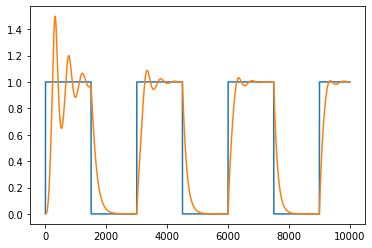

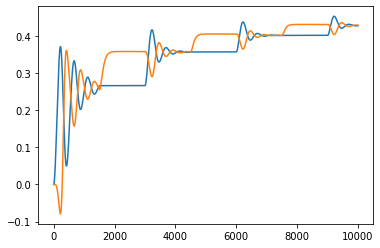

In [28]:
T = 0.01
sample_depth = int(100/T) # 1000 samples totalling 100 seconds (since sample time T is 0.1 secons)
sample_range = range(sample_depth)

t = [i for i in sample_range]
uc = np.ones(sample_depth)
uc[np.where([m.sin(t[i]*m.pi*T/15)<=0 for i in sample_range])] = 0

# actual parameters
b = 2
beta = 1
alpha = 1
gamma = 0.5

y = [0]
ym = [0]
u = [0]
e = 0

theta_1 = [0]
theta_2 = [0]

for i in range(sample_depth):
    theta_1.append(theta_1[i] - T*e*gamma*uc[i])
    theta_2.append(theta_2[i] + T*e*gamma*y[i])
    
    y.append(y[i] + T*b*(theta_1[-1]*uc[i] - theta_2[-1]*y[i]))
    ym.append(ym[i] + T*(-alpha*ym[i] + beta*uc[i]))
    
    e = y[i] - ym[i]
y.pop(-1)
theta_1.pop(-1)
theta_2.pop(-1)

plt.plot(t,uc)
plt.plot(t,y)
plt.show()

plt.plot(t, theta_1)
plt.plot(t, theta_2)
    